In [84]:
import numpy as np
from scipy.interpolate import SmoothBivariateSpline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyval
import h5py
%matplotlib notebook

In [85]:
x = []
y = []
z = []
grid_length = 10
for i in range(grid_length):
    for j in range(grid_length):
        pi = np.random.rand() - .5
        pj = np.random.rand() - .5
        x.append(i + pi)
        y.append(j + pj)
        z.append(np.sin(i + pi) + np.cos(j + pj))

<IPython.core.display.Javascript object>


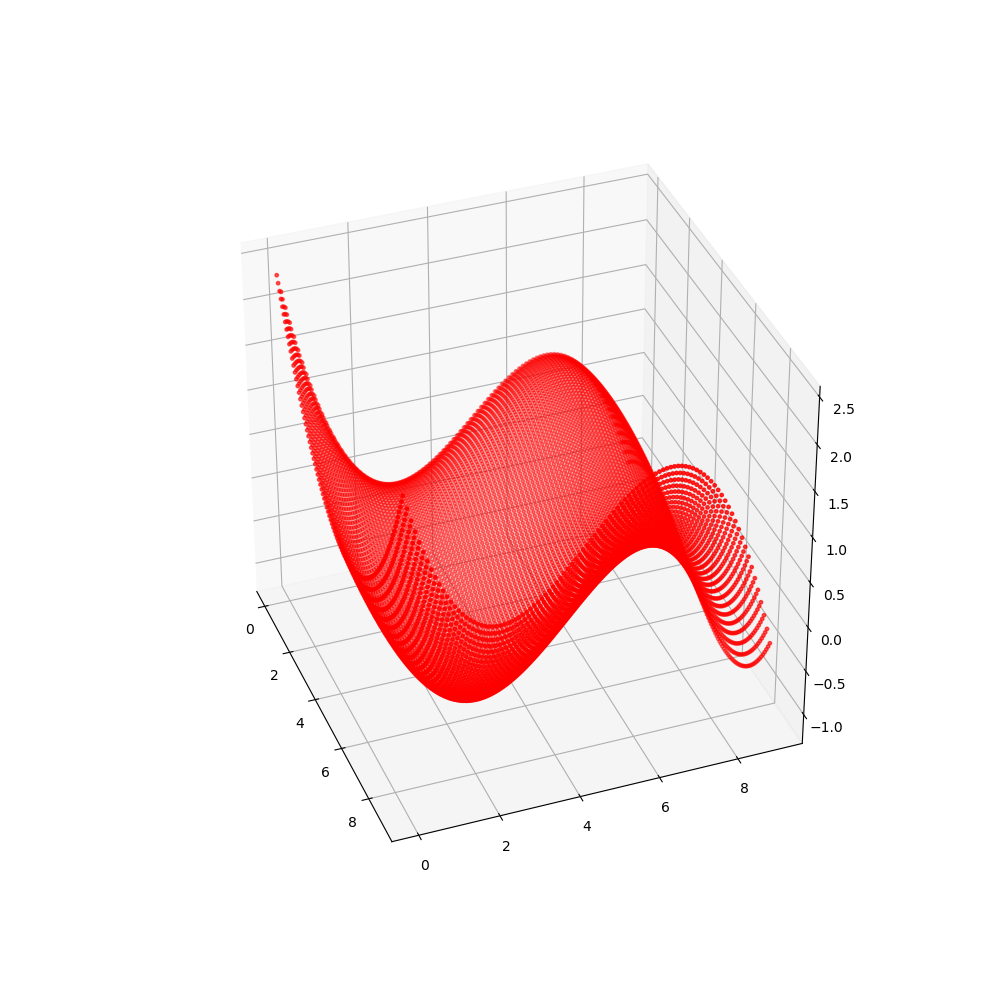

In [86]:
fig1 = plt.figure(1, figsize=(10,10))
ax = fig1.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c='r', s=6)
plt.show()

In [87]:
spline = SmoothBivariateSpline(x,y,z)

In [88]:
x_points = []
y_points = []
for i in np.linspace(0, grid_length-1, num=100):
    for j in np.linspace(0, grid_length-1, num=100):
        x_points.append(i)
        y_points.append(j)
z_points = spline.ev(x_points, y_points)

In [89]:
fig2 = plt.figure(1, figsize=(10,10))
ax = fig2.add_subplot(111, projection='3d')
sc = ax.scatter(x_points, y_points, z_points, c='r', s=6)
plt.show()

### Least squares fit on the smf

In [2]:
filename = '/home/magnus/data/observational_data/all_data.h5'
file = h5py.File(filename, 'r')
# print("Keys: ", list(file.keys()))
universe_0 = file['Universe_0']
# print("Keys: ", list(universe_0.keys()))

Keys:  ['Universe_0']
Keys:  ['CSFRD', 'Clustering', 'FQ', 'Model_Parameters', 'SMF', 'SSFR']


In [3]:
# Get the SMF objects from the universe
smf = universe_0['SMF']
#smf?
# List all objects
# print("Keys: ", list(smf.keys()))
# Get the dataset 'Data'
data = smf['Data']
# print("Keys of Data: ", list(data.keys()))
data_keys = list(data.keys())
model = smf['Model']
sets = smf['Sets']
# print(list(sets))
# print(list(data['051 Caputi 2011 (z = 3.50 - 4.25)']))
# print(list(data))
#data?

[(39, 0, 0., 0.2, b'Li & White 2009'), (21, 39, 0., 0.06, b'Baldry 2012'), (32, 60, 0., 0.2, b'Bernardi 2013'), (20, 92, 0., 0.2, b'Perez-Gonzalez 2008'), (20, 112, 0.2, 0.4, b'Perez-Gonzalez 2008'), (17, 132, 0.4, 0.6, b'Perez-Gonzalez 2008'), (14, 149, 0.6, 0.8, b'Perez-Gonzalez 2008'), (13, 163, 0.8, 1., b'Perez-Gonzalez 2008'), (13, 176, 1., 1.3, b'Perez-Gonzalez 2008'), (11, 189, 1.3, 1.6, b'Perez-Gonzalez 2008'), (10, 200, 1.6, 2., b'Perez-Gonzalez 2008'), (9, 210, 2., 2.5, b'Perez-Gonzalez 2008'), (7, 219, 2.5, 3., b'Perez-Gonzalez 2008'), (6, 226, 3., 3.5, b'Perez-Gonzalez 2008'), (6, 232, 3.5, 4., b'Perez-Gonzalez 2008'), (19, 238, 0.6, 1., b'Santini 2012'), (15, 257, 1., 1.4, b'Santini 2012'), (13, 272, 1.4, 1.8, b'Santini 2012'), (11, 285, 1.8, 2.5, b'Santini 2012'), (9, 296, 2.5, 3.5, b'Santini 2012'), (8, 305, 3.5, 4.5, b'Santini 2012'), (15, 313, 0.2, 0.5, b'Ilbert 2013'), (13, 328, 0.5, 0.8, b'Ilbert 2013'), (12, 341, 0.8, 1.1, b'Ilbert 2013'), (10, 353, 1.1, 1.5, b'Ilbe

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RankWarning: Polyfit may be poorly conditioned


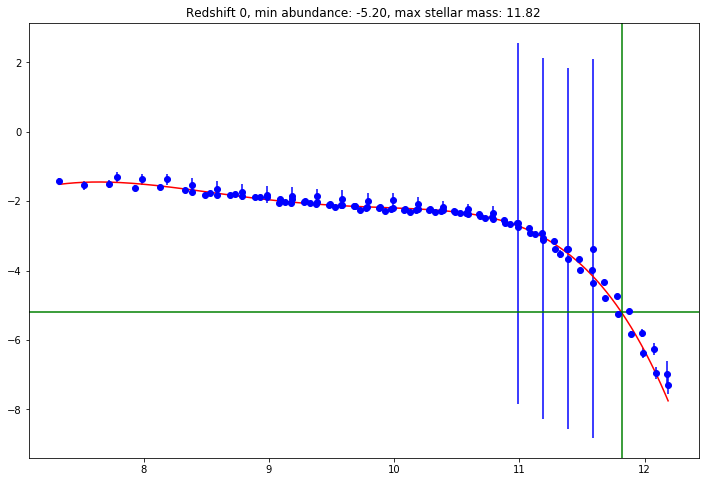

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RankWarning: Polyfit may be poorly conditioned


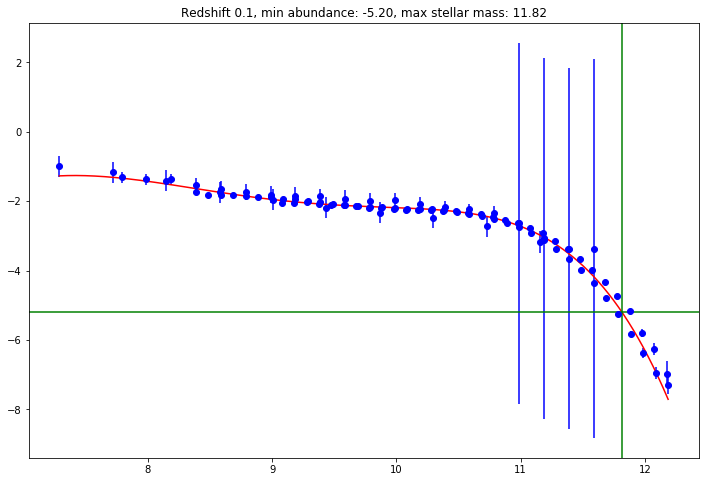

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RankWarning: Polyfit may be poorly conditioned


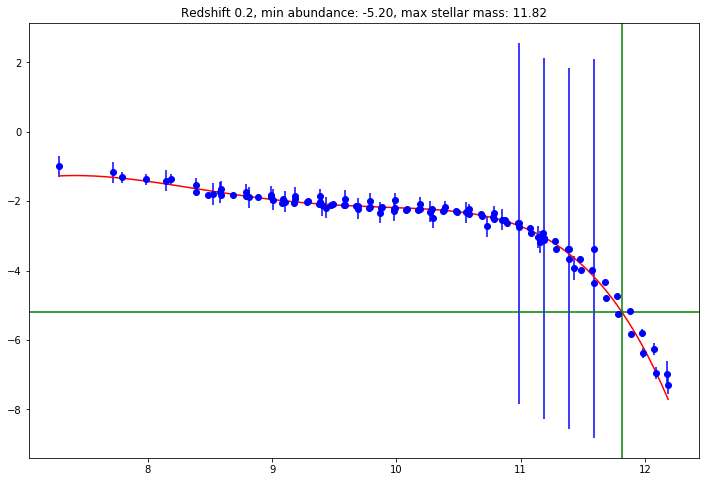

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RankWarning: Polyfit may be poorly conditioned


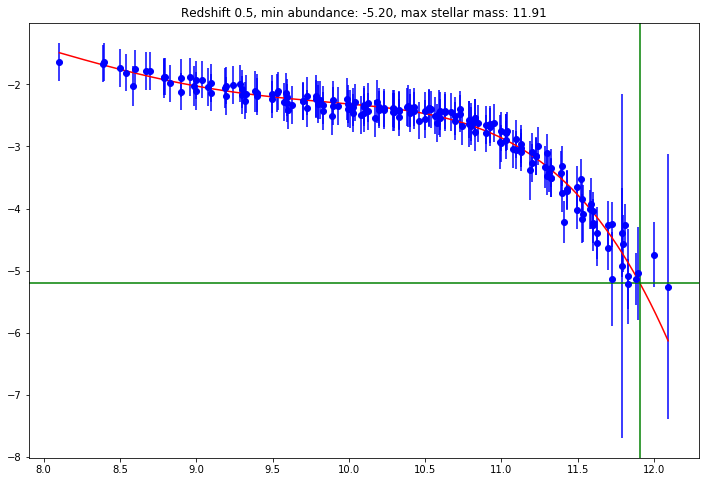

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RankWarning: Polyfit may be poorly conditioned


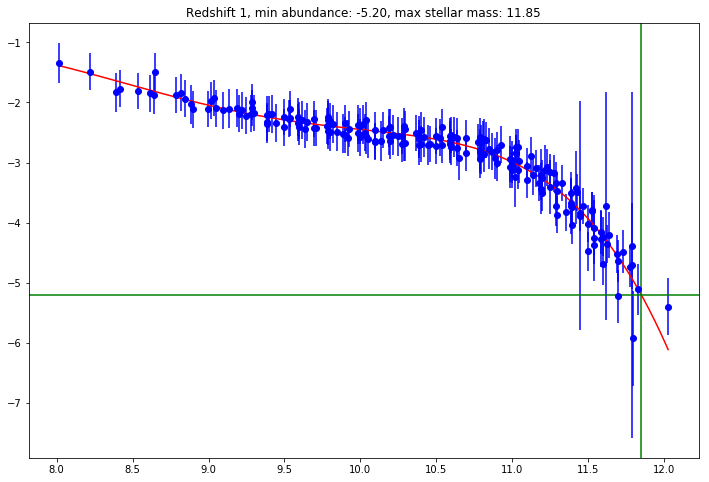

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RankWarning: Polyfit may be poorly conditioned


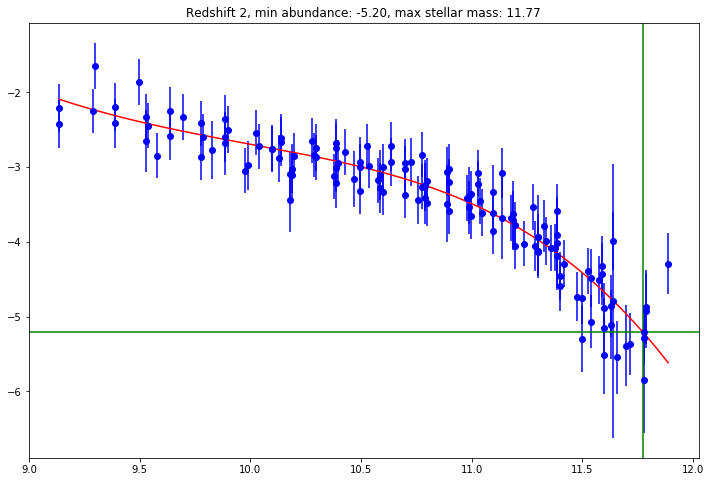

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RankWarning: Polyfit may be poorly conditioned


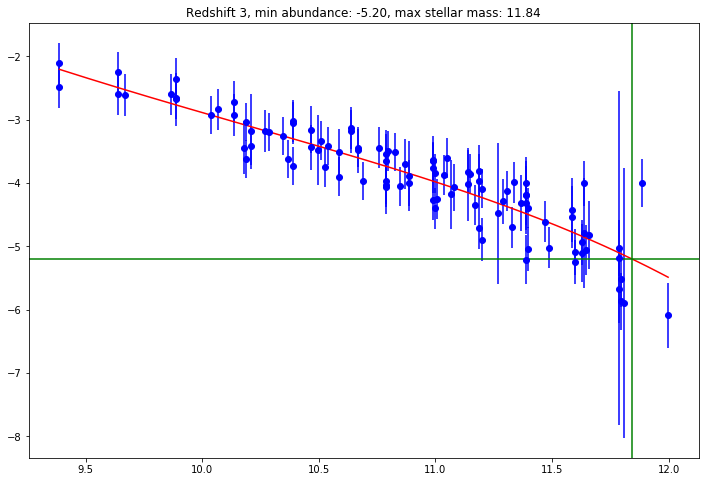

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RankWarning: Polyfit may be poorly conditioned


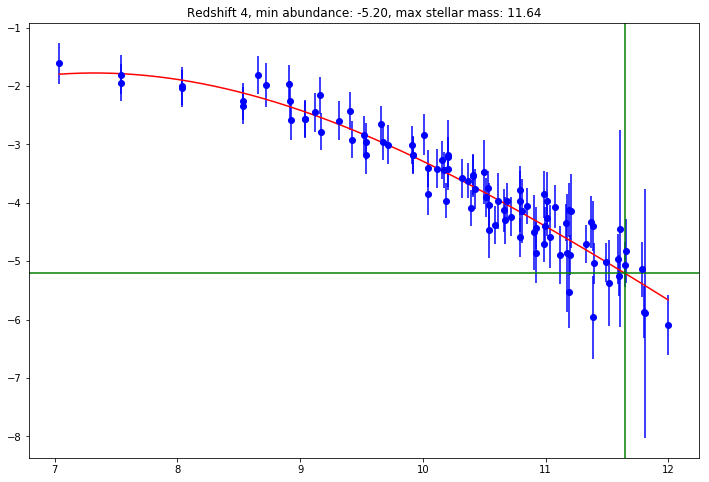

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RankWarning: Polyfit may be poorly conditioned


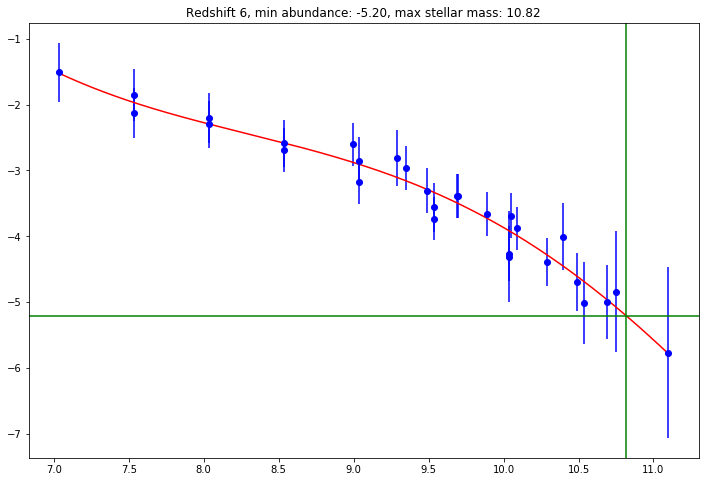

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RankWarning: Polyfit may be poorly conditioned


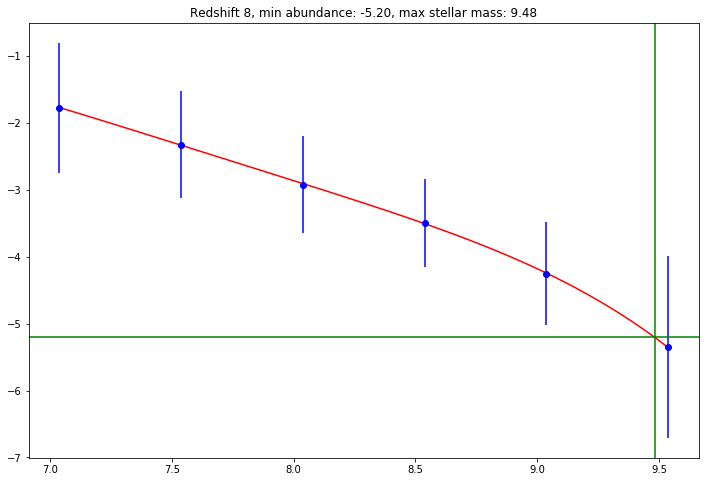

In [73]:
# Go through all of the data sets, store only data points within the redshifts the network has been trained to predict
predicted_redshifts = [0,.1,.2,.5,1,2,3,4,6,8]
bin_width = 0.2
box_size = 200
min_count = 10
degree = 6
n_points = 10000

min_abundance = np.log10(min_count / box_size**3 / bin_width)

for predicted_redshift in predicted_redshifts:
    observable_data = {
        'stellar_masses': [],
        'abundances': [],
        'errors': []
    }

    for i_key, key in enumerate(list(data)):
        min_redshift = list(sets)[i_key][2]
        max_redshift = list(sets)[i_key][3]
        if predicted_redshift >= min_redshift and predicted_redshift <= max_redshift:
            observable_data['stellar_masses'].extend([list(point)[0] for point in list(data[key])])
            observable_data['abundances'].extend([list(point)[1] for point in list(data[key])])
            observable_data['errors'].extend([list(point)[2] for point in list(data[key])])

    # print(observable_data['stellar_masses'])
    # print(observable_data['abundances'])
    # print(observable_data['errors'])

    # print(len(observable_data['stellar_masses']))
    # print(len(observable_data['abundances']))
    # print(len(observable_data['errors']))

    weights = 1 / np.array(observable_data['errors'])
    x = np.linspace(np.min(observable_data['stellar_masses']), np.max(observable_data['stellar_masses']), n_points)
    p3 = np.polyfit(observable_data['stellar_masses'], observable_data['abundances'], degree, w=weights)
    # find where it reaches the minimum abundance
    # p_find = np.polyfit(observable_data['stellar_masses'], np.array(observable_data['abundances']) - min_abundance, degree, w=weights)
    # p_find_2 = np.poly1d(p_find)
    # p_find_2.r
    max_mass_ind = np.argmin(np.absolute(polyval(x, np.flip(p3, axis=0)) - min_abundance))
   
    fig = plt.figure(figsize=(12,8))
    plt.errorbar(observable_data['stellar_masses'], observable_data['abundances'], yerr=observable_data['errors'], fmt = 'bo')
    plt.plot(x, polyval(x, np.flip(p3, axis=0)), 'r-')
    plt.axvline(x=x[max_mass_ind], color='green')
    plt.axhline(y=min_abundance, color='green')
    plt.title('Redshift {}, min abundance: {:.2f}, max stellar mass: {:.2f}'.format(predicted_redshift, min_abundance,
                                                                                    x[max_mass_ind]))
    plt.show()

In [83]:
a = np.arange(7, 12.5, 0.2)
print(a)

[ 7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2  9.4  9.6
  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2 11.4 11.6 11.8 12.  12.2 12.4]


In [63]:
print(min_abundance)
print(polyval(x, np.flip(p3, axis=0)))
print(np.absolute(polyval(x, np.flip(p3, axis=0))))
print(np.absolute(polyval(x, np.flip(p3, axis=0)) - min_abundance))
print(np.argmin(np.absolute(polyval(x, np.flip(p3, axis=0)) - min_abundance)))
print(polyval(x, np.flip(p3, axis=0))[np.argmin(np.absolute(polyval(x, np.flip(p3, axis=0)) - min_abundance))])

-4.903089986991944
[-1.76804546 -1.76831894 -1.76859244 ... -5.35488642 -5.35559355
 -5.35630086]
[1.76804546 1.76831894 1.76859244 ... 5.35488642 5.35559355 5.35630086]
[3.13504453 3.13477105 3.13449755 ... 0.45179643 0.45250356 0.45321087]
9298
-4.90291374932459
